In [1]:
!pip install joblib

[[13193   508]
 [ 1906  1188]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92     13701
           1       0.70      0.38      0.50      3094

    accuracy                           0.86     16795
   macro avg       0.79      0.67      0.71     16795
weighted avg       0.84      0.86      0.84     16795



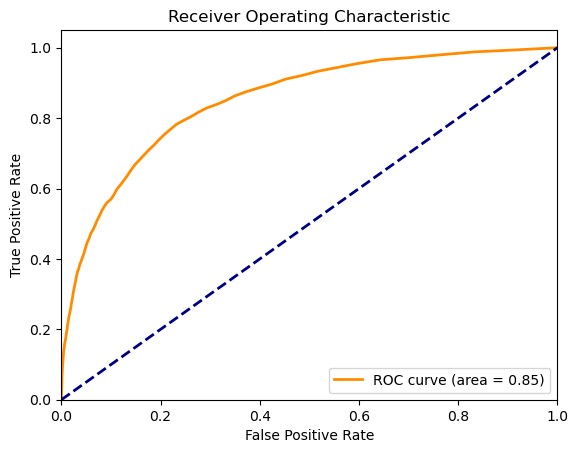

Le modèle Random Forest a été sauvegardé avec succès.


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import pickle

# Charger le DataFrame encodé
DF_HPS_VF_cleaned_encoded = pd.read_csv('/Users/ikram/Documents/FinaleProject/DF_HPS_VF_cleaned_encoded.csv')

# Séparation des features et de la target
X = DF_HPS_VF_cleaned_encoded.drop(['DEPRESSED', 'DOWN', 'WORRY', 'INTEREST', 'ANXIOUS'], axis=1)
y = DF_HPS_VF_cleaned_encoded['DEPRESSED']

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialisation et entraînement du modèle
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = rf_model.predict(X_test)

# Évaluation du modèle
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Affichage de la courbe ROC
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Sauvegarde du modèle entraîné
with open('/Users/ikram/Documents/FinaleProject/random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("Le modèle Random Forest a été sauvegardé avec succès.")


In [11]:
import streamlit as st
import pandas as pd
import numpy as np
import pickle

# Charger le modèle
with open('/Users/ikram/Documents/FinaleProject/random_forest_model.pkl', 'rb') as file:
    rf_model = pickle.load(file)

# Titre de l'application
st.title("Détection de la Dépression")

# Description de l'application
st.write("Cette application prédit le risque de dépression en fonction des facteurs d'entrée.")

# Entrées de l'utilisateur
age = st.slider('Âge', 0, 100, 25)
sexe = st.selectbox('Sexe', ('Homme', 'Femme'))
# Ajouter d'autres caractéristiques nécessaires pour votre modèle

# Transformation des entrées utilisateur
sexe = 0 if sexe == 'Homme' else 1  # Exemple de transformation simple pour le sexe

# Préparer les données pour la prédiction
input_data = pd.DataFrame([[age, sexe]], columns=['Age', 'Sexe'])
# Assurez-vous que les données sont formatées correctement pour votre modèle

# Faire une prédiction
if st.button('Prédire'):
    prediction = rf_model.predict(input_data)
    st.write(f'Le risque de dépression est: {prediction[0]}')

# Afficher les résultats
st.write("Résultats de la prédiction:")
st.write(prediction)


2024-07-12 05:12:47.594 
  command:

    streamlit run /Applications/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-07-12 05:12:47.597 Session state does not function when running a script without `streamlit run`


NameError: name 'prediction' is not defined